# Find the GW skies which would have been detected

In [ ]:
#!/usr/bin/env python
"""step2_find_detected_GW_skies.ipynb: a notebook to find detectable GW skies """

__author__ = "Chiara M. F. Mingarelli"
__copyright__ = "Copyright 2016, GWASAP project"
__credits__ = ["Chiara Mingarelli"]
__license__ = "GPL"
__version__ = "0.0.1"
__maintainer__ = "Chiara Mingarelli"
__email__ = "mingarelli@gmail.com"

In [1]:
from __future__ import division
import os
from IPython.display import display, Math, Latex
import math
from math import sqrt, cos, sin, pi
import numpy as np
import statsmodels.api as sm
from scipy.interpolate import interp1d
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib.mlab as ml
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import healpy as hp
import plot_mpl2 as plot
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy import stats
from scipy.stats import skewnorm



%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
nside = 2**6
freq_choice = np.loadtxt("../gw_freqs1.dat") #available GW frequencies

In [3]:
files = []
# this is the path to where you store all the GW realizations
for i in os.listdir('../../rusty_data/HR04_Reg/30_dex/'):
    if i.endswith('.txt'):
        files.append(i)

In [4]:
def find_nearest(array ,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

In [5]:
fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 4,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.family': 'serif',
        #'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

In [6]:
#RA_tot, DEC_tot, gw_freq_vec, strain_vec, mchirp_rec,q_rec, gal_cat_name, dist_list, mstar_list, 
#save_p, gal_choice, T_z_list, mergRate_list, t2c_list, z_list, r_inf_list, friction_list, 
#hardening_list, num_zeros

file_s = []
gal_z = []
stall = []
r_inf = []
no_of_skies = len(files)

# remember to update the path here to the one with all your realizations
for jj in range(no_of_skies):
    filename = files[jj]
    sim_sky = np.genfromtxt("../../rusty_data/HR04_Reg/30_dex/" + str(filename))    
    RA = sim_sky[:,0] #phi, add pi to this for healpix maps
    file_s.append(RA.size) # number of galaxies in file
    gal_z.append(sim_sky[:,-5])
    stall.append(sim_sky[0][-1])
    #r_inf.append(sim_sky[:,-4])


In [7]:
no_of_skies

106048

In [8]:
10**0.68

4.786300923226384

In [9]:
def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    # for nice looking bins
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list

In [ ]:
hist_bin = auto_bin(.2, .1, 4)

In [ ]:
no_of_skies = len(files)
ran_z = np.random.choice(gal_z, 50, replace=False) # choose a sample of 50 random galaxies

In [ ]:
len(ran_z)

In [ ]:
test = []
for i in range(len(ran_z)):
    test.append(plt.hist(ran_z[i], hist_bin, weights = hist_weight(ran_z[i])))
plt.ylabel("Count")
plt.xlabel("redshift $z$ of galaxy-galaxy merger")  
plt.tight_layout()
plt.savefig("plots_hr04_30/step_2/30_redshift_hr04.pdf")

In [ ]:
#takes a long time
no_of_bins = hist_bin.size
avg_test = []
tMean = []
tStd = []

for j in range(no_of_bins - 1):
    for i in range(len(ran_z)):
        inst = plt.hist(gal_z[i], hist_bin, weights = hist_weight(gal_z[i]))[0][j]
        #print inst, i, j
        avg_test.append(inst)
    tMean.append(np.mean(avg_test))
    tStd.append(np.std(avg_test))
    avg_test = []
    print ("Mean value for j is ", tMean[j], j)


In [ ]:
ind = avg_test[0][1]

In [ ]:
avg_test

In [ ]:
print ind[0:19]

In [ ]:
print(len(tMean))
print(tMean)
print(tStd)

In [ ]:
hist_bin = hist_bin[:-1]

In [ ]:
fig, ax = plt.subplots()
a1 = ax.bar(hist_bin, tMean, yerr=tStd,edgecolor = 'black', width = 0.2, alpha = 0.8)
plt.xlim(0,4)
plt.ylim(0,.4)
majorLocator = MultipleLocator(.3)
#minorLocator = MultipleLocator(5)
#ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
#ax.set_xticks(np.around(ind[0:19],1))
#for tick in ax.xaxis.get_major_ticks():
#    tick.label1.set_horizontalalignment('center')
#    tick.label.set_fontsize(6) 
plt.ylabel("Probability")
plt.xlabel("Redshift $z$ of galaxy-galaxy merger")
plt.tight_layout()
plt.savefig("plots_hr04_30/step_2/30_redshift_avg_hr04.pdf")


In [10]:
max(stall)

768.0

In [11]:
weightsSt =  np.ones_like(stall)/len(stall)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


25.432728575739286 27.012079542532195
(0.9326610245842901, -0.6466257780025557, 17.231530579096077)
[0.00135015 0.01092217 0.02149382 0.0293271  0.03429703 0.03703938
 0.03819785 0.03827608 0.03763878 0.03654222 0.03516403 0.03362637
 0.03201268 0.03037943 0.02876433 0.02719203 0.02567807 0.02423166
 0.02285762 0.02155775 0.0203318  0.01917814 0.01809426 0.01707708
 0.01612325 0.01522923 0.01439151 0.01360659 0.01287111 0.01218183
 0.01153568 0.01092976 0.01036135 0.00982789 0.00932699 0.00885645
 0.00841418 0.00799827 0.00760694 0.00723853 0.0068915  0.00656444
 0.00625602 0.00596501 0.00569028 0.00543078 0.00518553 0.00495362
 0.00473421 0.00452651 0.00432979 0.00414339 0.00396666 0.00379903
 0.00363994 0.00348889 0.00334541 0.00320904 0.00307938 0.00295603
 0.00283865 0.00272689 0.00262044 0.002519   0.0024223  0.00233007
 0.00224207 0.00215809 0.00207789 0.00200128 0.00192808 0.00185811
 0.00179119 0.00172717 0.00166591 0.00160727 0.00155111 0.00149731
 0.00144576 0.00139634 0.0013

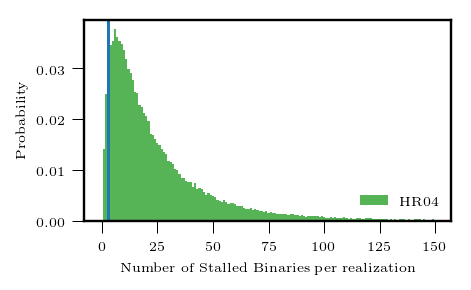

In [16]:
bin_size = 1; min_edge = 0; max_edge = 150
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

(mu, sigma) = norm.fit(stall)
print(mu, sigma)




shape, loc, scale = scipy.stats.lognorm.fit(stall)

param=scipy.stats.lognorm.fit(stall)
#param[0] = scatter
#param[1] = loc
#np.log(param[2]) = mean
print(param)


pdf_fitted = scipy.stats.lognorm.pdf(bin_list, param[0], loc=param[1], scale=param[2]) # fitted distribution

#plt.plot(bin_list,pdf_fitted,'r-')
plt.hist(stall, bin_list, weights = weightsSt, alpha =0.8, align='left', color = "C2", label = "HR04")



plt.ylabel("Probability")
plt.xlabel("Number of Stalled Binaries per realization")
plt.legend(frameon=False,loc=4)
plt.tight_layout()
plt.axvline(np.log(param[2]))
#use that number 


plt.savefig("plots_hr04_30/step_2/no_stalled_hr04_PPT.pdf")

In [40]:
weightsG = np.ones_like(file_s)/len(file_s)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


227.82407966203982 128.67070743101365
(0.5256464999322747, -5.313702769941033, 203.29116158575033)
1.6915520832601425
1.941912674894269e+88


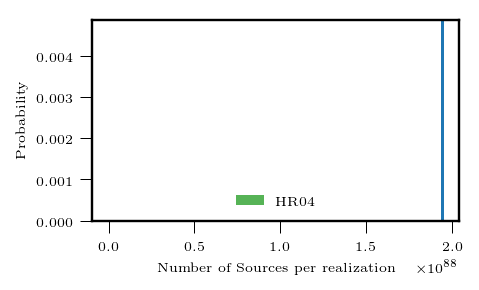

In [19]:
bin_size = 1; min_edge = 0; max_edge = 600
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

(mu, sigma) = norm.fit(file_s)
print(mu, sigma)



shape, loc, scale = scipy.stats.lognorm.fit(file_s)

param=scipy.stats.lognorm.fit(file_s)
print(param)

pdf_fitted = scipy.stats.lognorm.pdf(bin_list, param[0], loc=param[1], scale=param[2]) # fitted distribution
#plt.plot(bin_list,pdf_fitted,'r-')
plt.hist(file_s, bin_list, weights = weightsSt, alpha =0.8, align='left', color = "C2", label = "HR04")


print(np.exp(param[0]))
print(np.exp(param[2]))

plt.ylabel("Probability")
plt.xlabel("Number of Sources per realization")
plt.tight_layout()

plt.legend(frameon=False)


plt.savefig("plots_hr04_30/step_2/no_sources_hr04_ppt.pdf")

In [ ]:
e**(5.28)

In [ ]:
print(mu, sigma, skew)

In [ ]:
weightsG = np.ones_like(file_s)/len(file_s)

In [ ]:
min(file_s)

In [ ]:
bin_size = 1; min_edge = 20; max_edge = 500
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

(mu, sigma) = norm.fit(file_s)
y = mlab.normpdf(bin_list, mu, sigma)
#l = plt.plot(bin_list, y, 'r--', linewidth=2)

print(stats.describe(file_s))
nobs, minmax, mu, sigma, skew, kurt = stats.describe(file_s)




l = plt.plot(bin_list, skewnorm.pdf(bin_list, *skewnorm.fit(file_s)))


plt.hist(file_s, bin_list, weights = weightsG, alpha =0.8, align='left')
plt.ylabel("Probability")
plt.xlabel("Number of Galaxies per Realization")
plt.tight_layout()
plt.savefig("plots_hr04/step_2/no_sources_hr04.pdf")



In [ ]:
mu, sigma

In [ ]:
print(stall)
print(files_s)

In [ ]:
# File contents are the following:
#RA_tot, DEC_tot, gw_freq_vec, strain_vec, mchirp_rec,q_rec, gal_cat_name, dist_list, mstar_list, 
#save_p, gal_choice, T_z_list, mergRate_list, t2c_list, z_list, r_inf_list, friction_list, 
#hardening_list, num_zeros

In [ ]:
no_of_skies = len(files)

for jj in range(no_of_skies):
    filename = files[jj]
    sim_sky = np.genfromtxt("../../rusty_data/HR04_Reg/test01/"+str(filename))

    RA = sim_sky[:,0] #phi, add pi to this for healpix maps
    DEC = sim_sky[:,1] #theta
    freq = sim_sky[:,2]
    strain = sim_sky[:,3]
    mchirp_rec = sim_sky[:,4]
    q_rec = sim_sky[:,5]
    gal_cat_name = np.genfromtxt("../../rusty_data/HR04_Reg/test01/"+str(filename), usecols = 6, dtype='S13')

    dist_list = sim_sky[:,7]
    mstar_list = sim_sky[:,8]
    save_p = sim_sky[:,9]
    gal_choice = sim_sky[:,10] 
    T_z_list = sim_sky[:,11] 
    mergRate_list =sim_sky[:,12] 
    t2c_list = sim_sky[:,13] 
    z_list = sim_sky[:,14] 
    file_size = strain.size # number of galaxies in file

    for ii in range(file_size):
        look_up_freq = find_nearest(freq_choice, freq[ii]) # what is the closest GW freq (out of 87)?
        healpix_map = hp.read_map('../../healpix_maps/strain_map_freq_'+str(look_up_freq)+'Hz.fits')
        pixNo = hp.pixelfunc.ang2pix(nside, pi/2-DEC[ii], pi+RA[ii]) # ± angles for correct display in healpix
        pixStrain = healpix_map[pixNo]
        #hp.mollview(healpix_map)
        if strain[ii] > pixStrain and strain[ii]>1e-15:
            dest_file = "../../detectedSkies/detected_skies_HR04_10.txt"    
            with open(dest_file, 'a+') as f:
                f.write('{0} {1} {2} {3} {4} {5} {6} {7} {8} {9} {10} {11} {12} {13} {14}\n'.format(RA[ii], \
                DEC[ii], look_up_freq, strain[ii], filename, mchirp_rec[ii],q_rec[ii], dist_list[ii], mstar_list[ii], \
                save_p[ii], gal_choice[ii], T_z_list[ii], mergRate_list[ii], t2c_list[ii], z_list[ii] ))
    #print "Realization "+str(jj)+", "+str((jj/no_of_skies)*100)+"%"